In [1]:
import os
import sys
import glob
sys.path.append('..') #Adding the parent folder to import files from there

In [2]:
import src.loader as loader
import src.models.rnn as rnn
from ipywidgets import FloatProgress

/home/phong/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
source = [
    ('firstname', 'firstnames.firstname', 100),
    
    ('name', 'names.name', 100),
    
    ('code', 'patients.gender', 10),
    ('code', 'admissions.marital_status', 10),
    ('code', 'admissions.religion', 10),
    ('code', 'admissions.insurance', 10),
    ('code', 'admissions.admission_location', 10),
    ('code', 'prescriptions.drug_type', 30),
    ('code', 'prescriptions.dose_unit_rx', 20),
    
    ('date', 'prescriptions.startdate', 90),
    ('date', 'admissions.admittime', 10),
    
    ('id', 'admissions.hadm_id', 10),
    ('id', 'admissions.subject_id', 10),
    ('id', 'prescriptions.subject_id', 80),
    
    ('address', 'addresses.road', 100),
    
    ('city', 'addresses.city', 100)
]

In [4]:
dataset = []
labels = []
for column in source:
    if len(column) >= 3:
        label, column_name, nb_datasets = column
    else:
        label, column_name, nb_datasets = column, 1
    dataset.append((column_name, nb_datasets))
    labels += [label.upper()] * nb_datasets

In [5]:
%%time

max_value = len(labels)
bar = FloatProgress(min=0, max=max_value)
display(bar)

columns = loader.fetch_columns(dataset, dataset_size=100, load_bar=bar)

FloatProgress(value=0.0, max=700.0)

CPU times: user 943 ms, sys: 82.2 ms, total: 1.03 s
Wall time: 1.98 s


In [6]:
clf = rnn.RNNClassifier(rnn.RNN, 128)
X_train, y_train, X_test, y_test = clf.preprocess(columns, labels)

In [7]:
%%time

clf.fit(X_train, y_train)

5000 5% (0m 20s) 1.8443 10074 / ID ✓
10000 10% (0m 35s) 1.9047 faress / CITY ✗ (FIRSTNAME)
15000 15% (0m 47s) 0.1482 rue des mesanges / ADDRESS ✓
20000 20% (1m 1s) 1.5306 birane / CITY ✗ (FIRSTNAME)
25000 25% (1m 13s) 5.1487 protestant quaker / ADDRESS ✗ (CODE)
30000 30% (1m 26s) 0.3556 zohra / FIRSTNAME ✓
35000 35% (1m 38s) 2.2887 harald / CODE ✗ (FIRSTNAME)
40000 40% (1m 51s) 1.1155 bordeaux / NAME ✗ (CITY)
45000 45% (2m 4s) 0.9772 gargam / NAME ✓
50000 50% (2m 18s) 0.0000 2110-12-31t00:00:00 / DATE ✓
55000 55% (2m 29s) 1.0989 lise / CITY ✗ (FIRSTNAME)
60000 60% (2m 43s) 1.1878 loly / NAME ✗ (FIRSTNAME)
65000 65% (2m 55s) 0.0409 m / CODE ✓
70000 70% (3m 7s) 1.2037 denzel / NAME ✗ (FIRSTNAME)
75000 75% (3m 19s) 1.2695 gleize / FIRSTNAME ✗ (CITY)
80000 80% (3m 31s) 0.3297 rivedoux-plage / CITY ✓
85000 85% (3m 43s) 1.5475 schirmann / FIRSTNAME ✗ (NAME)
90000 90% (3m 55s) 0.0016 10124 / ID ✓
95000 95% (4m 7s) 1.9860 niort / NAME ✗ (CITY)
100000 100% (4m 19s) 0.1229 naida / FIRSTNAME ✓
CP

In [8]:
y_pred = clf.predict(X_test, sampling=0.4)
clf.score(y_pred, y_test)

FIRSTNAME           	14/15	   93.33% 	(FP:0)
NAME                	19/19	   100.0% 	(FP:1)
CODE                	22/22	   100.0% 	(FP:0)
DATE                	18/18	   100.0% 	(FP:0)
ID                  	23/23	   100.0% 	(FP:0)
ADDRESS             	21/21	   100.0% 	(FP:0)
CITY                	22/22	   100.0% 	(FP:0)
SCORE 139/140 :   99.29%


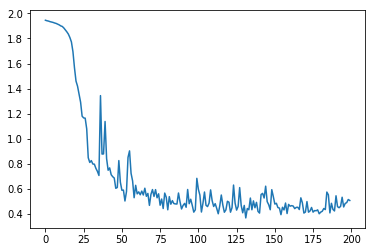

In [9]:
clf.plot_losses()